# WAMECU Milestone 4 – Digital Twin Lite

Milestone 4 sketches a simplified "digital twin" for lottery bias. We encode physics-inspired weights—heavier outcomes resist selection—and translate them into probabilities and WAMECU $\beta$ coefficients.


In [1]:
import sys, pathlib
CURRENT_DIR = pathlib.Path().resolve()
for candidate in [CURRENT_DIR, *CURRENT_DIR.parents[:3]]:
    src_path = candidate / 'src'
    if src_path.exists():
        sys.path.append(str(src_path))
        break


## Imports and helper setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wamecu import inverse_mass_probabilities, probabilities_to_beta

plt.style.use('seaborn-v0_8-whitegrid')
np.random.seed(123)


## Define weight scenarios

In [3]:
N_OUTCOMES = 6
SOFTNESS = 1.2

scenarios = {
    'Uniform masses': np.ones(N_OUTCOMES),
    'Gravity tail': np.linspace(1.0, 3.0, N_OUTCOMES),
    'Heavy core': np.concatenate([
        np.array([2.5, 1.5, 1.0, 1.0, 1.5, 2.5]),
    ]),
}

records = []
for name, weights in scenarios.items():
    probs = inverse_mass_probabilities(weights, softness=SOFTNESS)
    beta = probabilities_to_beta(probs)
    for idx, (p, b) in enumerate(zip(probs, beta)):
        records.append(
            {
                'Scenario': name,
                'Outcome': f'Outcome {idx}',
                'Weight': weights[idx],
                'Probability': p,
                'Beta': b,
            }
        )

distribution_df = pd.DataFrame.from_records(records)
distribution_df.head()


,Scenario,Outcome,Weight,Probability,Beta
0,Uniform masses,Outcome 0,1.0,0.166667,0.0
1,Uniform masses,Outcome 1,1.0,0.166667,0.0
2,Uniform masses,Outcome 2,1.0,0.166667,0.0
3,Uniform masses,Outcome 3,1.0,0.166667,0.0
4,Uniform masses,Outcome 4,1.0,0.166667,0.0


## Visualize probabilities under each scenario

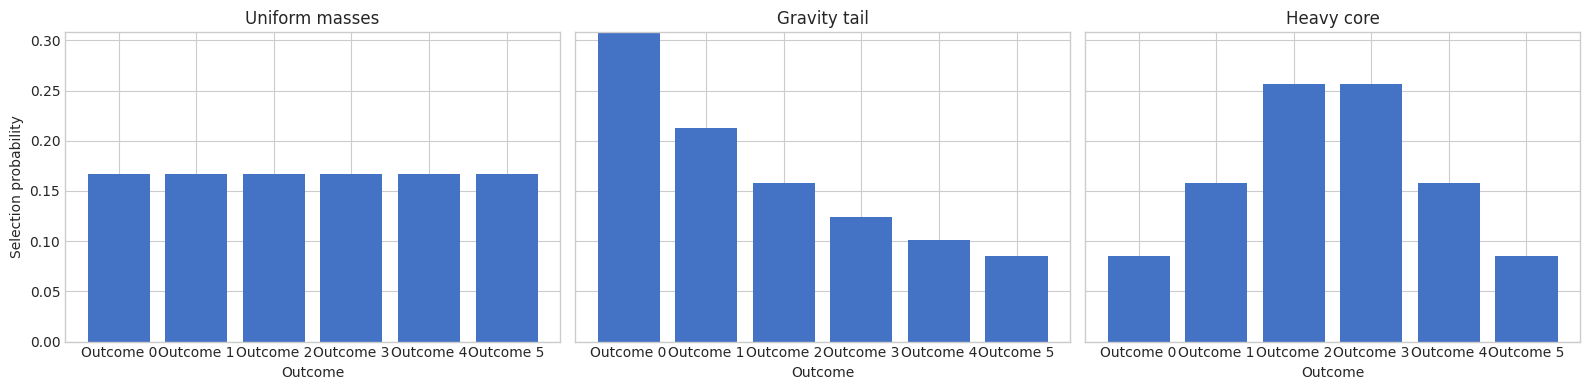

In [4]:
fig, axes = plt.subplots(1, len(scenarios), figsize=(16, 4), sharey=True)
for ax, (name, _) in zip(axes, scenarios.items()):
    subset = distribution_df[distribution_df['Scenario'] == name]
    ax.bar(subset['Outcome'], subset['Probability'], color='#4472c4')
    ax.set_title(name)
    ax.set_xlabel('Outcome')
    ax.set_ylim(0, subset['Probability'].max() * 1.2)
axes[0].set_ylabel('Selection probability')
plt.tight_layout()
plt.show()


## Inspect the resulting $\beta$ coefficients

In [5]:
beta_table = distribution_df.pivot_table(
    index='Outcome', columns='Scenario', values='Beta'
)

beta_table


Scenario,Gravity tail,Heavy core,Uniform masses
Outcome,,,
Outcome 0,0.913715,-0.487070,0.0
Outcome 1,0.277979,-0.053161,0.0
Outcome 2,-0.054742,0.540231,0.0
Outcome 3,-0.257032,0.540231,0.0
Outcome 4,-0.391992,-0.053161,0.0
Outcome 5,-0.487927,-0.487070,0.0


The inverse-mass mapping penalizes heavy outcomes, redistributing probability mass to lighter ones. These scenarios serve as blueprints for the streaming simulation in Milestone 5.